In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Load in data from csv
health_data = pd.read_csv("C:\\Users\\ashok\\Downloads\\learnpypanp\\Project\\Health Care Data Analysis with Python\\Health_dataset.csv")

#2. Display first few rows
print(health_data.head(5))

# .Check for Extra Spaces and removing them 
health_data.columns = health_data.columns.str.strip()


#3. display only few columns
#health_data = pd.read_csv("C:\\Users\\ashok\\Downloads\\learnpypanp\\Project\\Health Care Data Analysis with Python\\Health_dataset.csv", usecols=["Gender","Treatment"])
#print(health_data.head(10))

  Patient ID  Gender       Disease         Treatment               Hospital  \
0  PAT-00001    Male  Tuberculosis          Dialysis  City General Hospital   
1  PAT-00002  Female       Malaria          Dialysis  City General Hospital   
2  PAT-00003  Female       Malaria           Surgery  City General Hospital   
3  PAT-00004    Male        Asthma          Dialysis  City General Hospital   
4  PAT-00005  Female      Diabetes  Physical Therapy  City General Hospital   

  Admission Date Discharge Date Treatment Status Cause of Death Date of Birth  
0     2022-12-19     2023-01-16        Recovered            NaN    1973-06-05  
1     2023-03-29     2023-04-21        Recovered            NaN    1998-11-21  
2     2022-09-16     2022-10-15        Recovered            NaN    1942-02-14  
3     2022-02-07     2022-02-11        Recovered            NaN    1943-01-17  
4     2022-10-25     2022-10-30        Recovered            NaN    1979-07-28  


## 1.  Count Number of Patients

In [2]:
# Count Number of Patients
total_records=health_data.shape[0]


# what is the total number of Patients
print(total_records)

8000


## 2. Gender Count

In [3]:
# How is the patient population distributed by Gender

gender_count =health_data['Gender'].value_counts()
print("Gender Distribution")
print(gender_count)

Gender Distribution
Gender
Male      5206
Female    2794
Name: count, dtype: int64


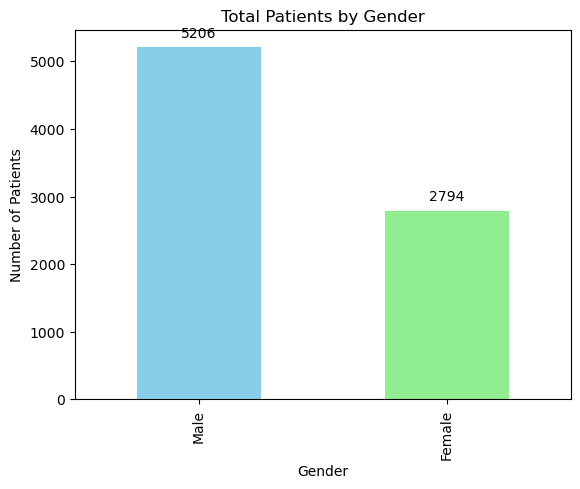

In [4]:
# Visualise gender Distribution
# Adding data labels

ax = gender_count.plot(kind="bar", color=['skyblue', 'lightgreen'])
plt.title("Total Patients by Gender")
plt.ylabel("Number of Patients")



# Label part
for bar in ax.patches:
    height= bar.get_height()
    ax.annotate(
    int(height),
     xy = (bar.get_x() + bar.get_width()/2, height),
     xytext = (0,5),
     textcoords="offset points",
    ha="center",va='bottom'
    )
    
plt.show()

## 3. Patients Age group by Total visit

0        41-60
1        21-40
2       81-100
3        61-80
4        41-60
         ...  
7995    81-100
7996      0-20
7997     21-40
7998     21-40
7999    81-100
Name: Age_Group, Length: 8000, dtype: category
Categories (5, object): ['0-20' < '21-40' < '41-60' < '61-80' < '81-100']
Age_Group
21-40     1645
41-60     1607
81-100    1599
61-80     1579
0-20      1533
Name: count, dtype: int64


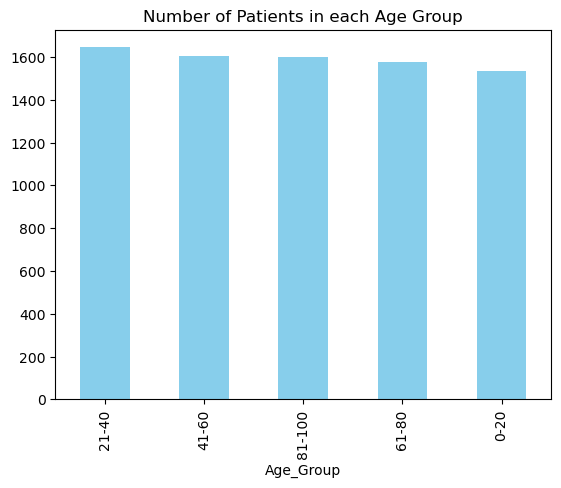

In [47]:
## 3. Patients Age group by Total visit

# convert Admission date and Date of Birth column in Data Fromat
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Discharge Date'] = pd.to_datetime(health_data['Discharge Date'])
health_data['Date of Birth'] = pd.to_datetime(health_data['Date of Birth'])

# calculate the patient age as of the time of Admission in year 
health_data['Age']= (health_data['Admission Date']-health_data['Date of Birth']).dt.days / 365
health_data['Age'] = health_data['Age'].astype(int )

# print(health_data['Age'])

# Define age in bins
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20','21-40','41-60','61-80','81-100']

# Create an age group using the bins var defined

health_data['Age_Group']= pd.cut(health_data['Age'], bins=bins, labels=labels, right= False)
print(health_data['Age_Group'])

# Count the number af Patients in each age group
age_count = health_data['Age_Group'].value_counts()
print(age_count)

# Visualise the age group
ax = age_count.plot(kind='bar', color='skyblue')
plt.title("Number of Patients in each Age Group")
plt.show()

In [6]:
print(health_data.columns.tolist())


['Patient ID', 'Gender', 'Disease', 'Treatment', 'Hospital', 'Admission Date', 'Discharge Date', 'Treatment Status', 'Cause of Death', 'Date of Birth', 'Age', 'Age_Group']


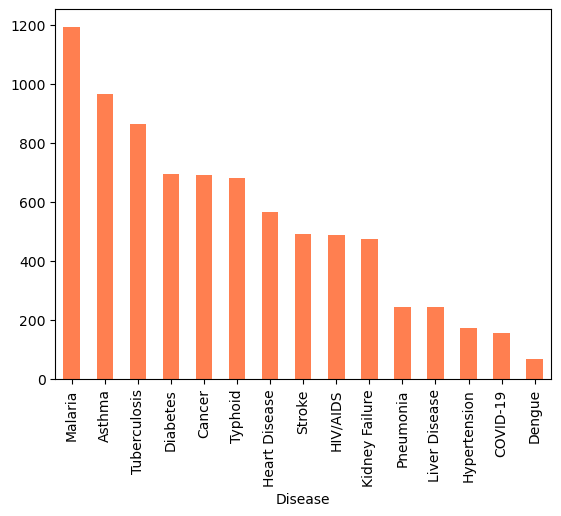

In [7]:
# Which diseases ae most commonly diagnosed among the patients?
disease_count=health_data['Disease'].value_counts()
ax=disease_count.plot(kind='bar',color='coral')
plt.show()

In [10]:
#Finding the top 3 disease in dynamic way and static way
disease_count=health_data['Disease'].value_counts().nlargest(3) # Get the top 3

top_3=disease_count.sum()

format_value="{:,}".format(top_3)

print("Total count of the most common disease: ",format_value)

"""
dynamictop = 3
disease_count=health_data['Disease'].value_counts().nlargest(dynamictop) 

dynamic_top=disease_count.sum()
format_value="{:,}".format(dynamic_top)
description = f"Total count of the {dynamictop} most common disease:"

print(description,format_value)

"""

Total count of the most common disease:  3,023


'\ndynamictop = 3\ndisease_count=health_data[\'Disease\'].value_counts().nlargest(dynamictop) \n\ndynamic_top=disease_count.sum()\nformat_value="{:,}".format(dynamic_top)\ndescription = f"Total count of the {dynamictop} most common disease:"\n\nprint(description,format_value)\n\n'

In [11]:
# Converting the toal into percentage
disease_count=health_data['Disease'].value_counts().nlargest(3) # Get the top 3

total_disease_count=health_data['Disease'].value_counts().sum()
# Claculate top 3 pecentage
percentage = (disease_count/total_disease_count)*100
roundperpercenatge = percentage.round(0).astype(int)

for disease, pct in roundperpercenatge.items():
    print(f"{disease}: {pct}%")
    


Malaria: 15%
Asthma: 12%
Tuberculosis: 11%


In [12]:
disease_count_top3=health_data['Disease'].value_counts().nlargest(3) # Get the top 3

total_disease_top3count=disease_count_top3.sum()

# Claculate top 3 pecentage
pcttop3 = (disease_count_top3/total_disease_top3count)*100
roundpct = pcttop3.round(0).astype(int)

for disease, pct in roundpct.items():
    print(f"{disease}: {pct}%")

Malaria: 39%
Asthma: 32%
Tuberculosis: 29%


In [13]:
# Are certain disease more prelevant in one gender compared to the other?

gender_disease = pd.crosstab(health_data['Disease'], health_data['Gender'])
print("Diseases that are common among genders:")
print(gender_disease)

Diseases that are common among genders:
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


In [14]:
# Calculate the duration of each patient stay and create a group to show numbers of patients in each group
health_data['Stay Duration'] = (health_data['Discharge Date'] - health_data['Admission Date']).dt.days

print(health_data[['Admission Date','Discharge Date', 'Stay Duration']].head(10))

  Admission Date Discharge Date  Stay Duration
0     2022-12-19     2023-01-16             28
1     2023-03-29     2023-04-21             23
2     2022-09-16     2022-10-15             29
3     2022-02-07     2022-02-11              4
4     2022-10-25     2022-10-30              5
5     2022-02-07     2022-02-15              8
6     2022-06-07     2022-06-30             23
7     2022-06-26     2022-06-27              1
8     2023-07-21     2023-08-07             17
9     2023-12-25     2024-01-05             11


In [15]:
## Group Stay Duration
bins = [-1,0,3,7,14, float('inf')]
labels = ["Same Day", "1-3 Days", "4-7 Days", "8-14 Days", "Above 21 Days"]
health_data['Stay Bucket'] = pd.cut(health_data['Stay Duration'], bins = bins, labels=labels, right = True)

print(health_data['Stay Bucket'])

0       Above 21 Days
1       Above 21 Days
2       Above 21 Days
3            4-7 Days
4            4-7 Days
            ...      
7995         4-7 Days
7996    Above 21 Days
7997        8-14 Days
7998    Above 21 Days
7999    Above 21 Days
Name: Stay Bucket, Length: 8000, dtype: category
Categories (5, object): ['Same Day' < '1-3 Days' < '4-7 Days' < '8-14 Days' < 'Above 21 Days']


In [ ]:
## Number of Patients on each group

In [16]:
total_group_patients = health_data['Stay Bucket'].value_counts()
print(total_group_patients)

Stay Bucket
Above 21 Days    4269
8-14 Days        1837
4-7 Days         1087
1-3 Days          807
Same Day            0
Name: count, dtype: int64


In [ ]:
## Create chart to Visualise it

Text(0.5, 1.0, 'Total Patients by length of stay')

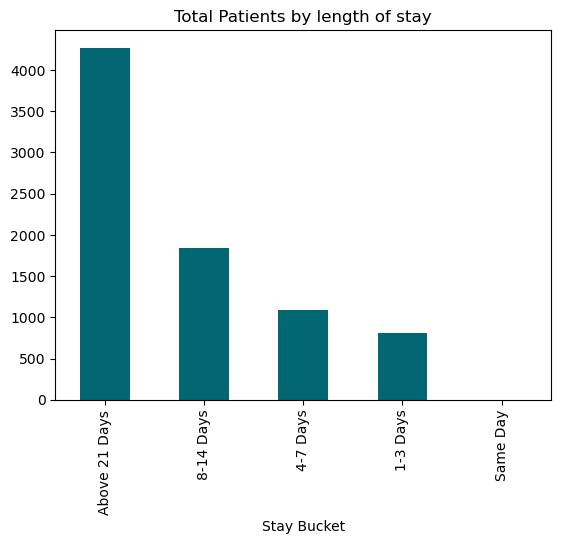

In [17]:
total_group_patients.plot(kind='bar', color=['#026773'])
plt.title("Total Patients by length of stay")

In [18]:
# For any records with  recorded "course of death", analyse to identify risk factor
death_cause=health_data.dropna(subset='Cause of Death')
count_cause = death_cause['Cause of Death'].value_counts()
print("Most common Cause of Death")
print(count_cause)

Most common Cause of Death
Cause of Death
Multiple Organ Failure    114
Respiratory Failure       109
Cardiac Arrest            102
Septic Shock               94
Name: count, dtype: int64


### Visualise the Finding

Text(0.5, 1.0, 'Top Causes of Death')

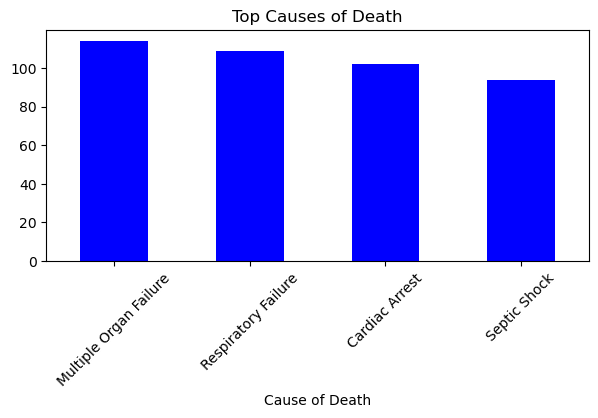

In [19]:
plt.figure(figsize= (7,3))
count_cause.plot(kind='bar', color='blue')
plt.xticks(rotation = 45)
plt.title("Top Causes of Death")

In [ ]:
## What are the percentage of the following patients:Deceased, Under-Treatment and Recovered Patiets?

In [20]:
#Total Patients
total_patients = health_data.shape[0]
total_patients

# Toatal Deceased PAtiemts
total_death = (health_data['Treatment Status'].str.lower()=='deceased').sum()
total_death

# Percentage of Deceased
death_rate = (total_death/total_patients)*100 if total_patients >0 else 0
death_rate

np.float64(5.2375)

In [21]:
print(f"Total Patients:",total_patients)
print(f"Total Casualities:",total_death)
print(f"Casuality Rate: ", death_rate)

Total Patients: 8000
Total Casualities: 419
Casuality Rate:  5.2375


In [22]:
# Recovered Patients
# Total Recovered PAtiemts
total_recovered = (health_data['Treatment Status'].str.lower()=='recovered').sum()
total_recovered

# Percentage of Recovered Patients
recovered_rate = (total_recovered/total_patients)*100 if total_patients >0 else 0
recovered_rate

np.float64(85.2375)

In [23]:
#Under Treatment Patients
under_treatment = 100 -(recovered_rate + death_rate)
under_treatment

np.float64(9.525000000000006)

In [ ]:
# Visualise all these in Donut chart

In [24]:
print(f"Total Recovery Rate:", recovered_rate)
print(f"Casuality Rate:", death_rate)
print(f"Under Treatment Rate:", under_treatment)

Total Recovery Rate: 85.2375
Casuality Rate: 5.2375
Under Treatment Rate: 9.525000000000006


Casuality Rate: 5.2375


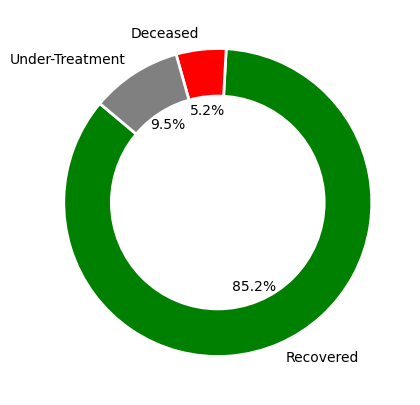

In [25]:
labels = ['Recovered','Deceased','Under-Treatment']
print(f"Casuality Rate:", death_rate)
sizes = [recovered_rate, death_rate, under_treatment]
colors=['green','red','grey']

plt.figure(figsize = (5,5))
plt.pie(sizes, labels = labels, autopct='%1.1f%%'
, colors=colors, startangle = 140, wedgeprops={'edgecolor':'White', 'linewidth':2})
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.show()

In [ ]:
# What are the peak days of the weekon a monthly bases for Admissions and Discharges

In [59]:
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
# Extract short day and month name
health_data['Admission Month'] = health_data['Admission Date'].dt.strftime('%b')
health_data['Admission Day'] = health_data['Admission Date'].dt.strftime('%a')

# Define proper order Month and Abbreviated Days

month_order = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep',
              'Oct','Nov','Dec']
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Creating Pivot Table
admission_heatmap = health_data.pivot_table(
    index = 'Admission Day',
    columns = 'Admission Month',
    aggfunc = 'size',
    fill_value = 0
)
#admission_heatmap

# Correct reorder of heatmap data
admission_heatmap_sorted = admission_heatmap.reindex(index = day_order, columns = month_order).fillna(0).astype(int)


admission_heatmap_sorted

Admission Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Admission Day,,,,,,,,,,,,
Mon,145,83,78,84,98,77,89,91,76,86,99,90
Tue,140,76,79,89,114,87,62,106,88,105,78,63
Wed,128,89,121,103,94,81,108,94,86,85,103,75
Thu,133,72,103,80,95,108,79,105,108,83,95,90
Fri,150,94,99,93,80,99,85,80,117,81,96,103
Sat,147,85,88,86,89,73,118,95,97,82,71,112
Sun,157,98,72,90,101,92,98,95,86,119,74,97


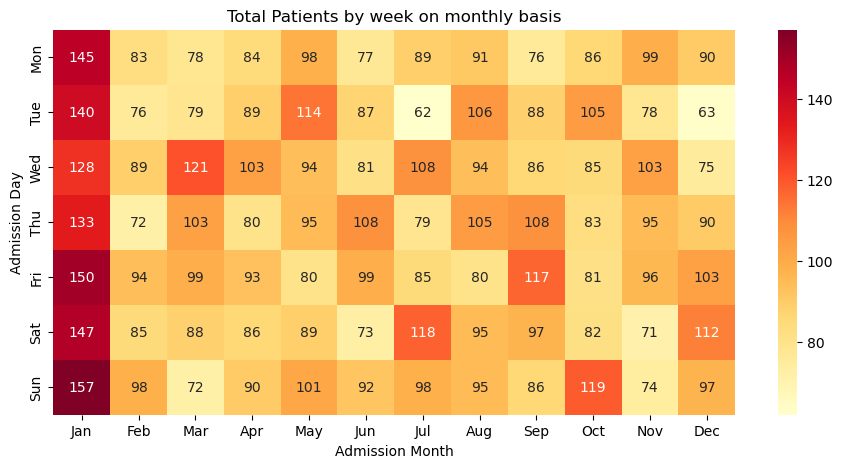

In [60]:
# Visualise the heatmap

plt.figure(figsize = (11,5))
sns.heatmap(admission_heatmap_sorted, annot=True, fmt="d", cmap='YlOrRd')
plt.title("Total Patients by week on monthly basis")
plt.show()


In [ ]:
# What is the Total number of Patients Admitted per week,month and year 
# Add a filter to filter by the month of year 

In [61]:
# Group data by the day name and count admission
admission_by_day = health_data.groupby('Admission Day').size()
admission_by_day = admission_by_day.reindex(day_order , fill_value = 0)
admission_by_day

Admission Day
Mon    1096
Tue    1087
Wed    1167
Thu    1151
Fri    1177
Sat    1143
Sun    1179
dtype: int64

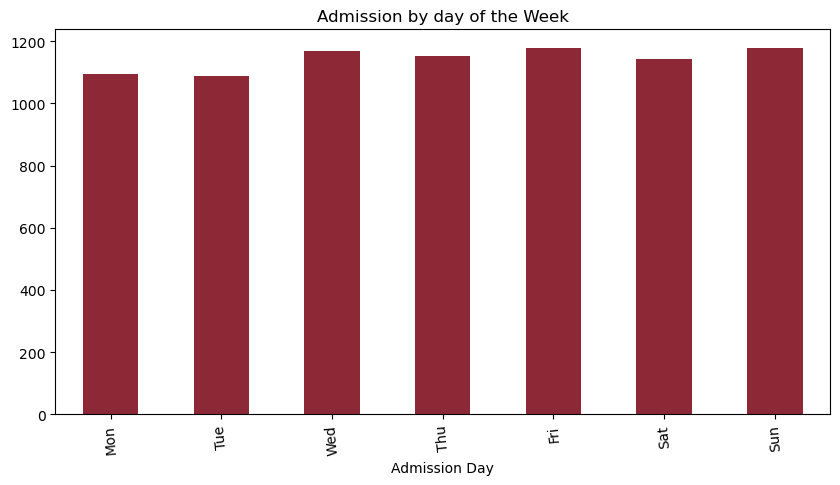

In [63]:
# Create a Visual
admission_by_day.plot(kind = 'bar', color = '#8D2837', figsize=(10,5))
plt.title("Admission by day of the Week")
plt.xticks(rotation=120)
plt.show()

In [67]:
# Top 3 days with high Admission
top3_admission_day = health_data['Admission Day'].value_counts().nlargest(3)
top3_admission_day

# Bottom 3 days 
bottom_3_admission_day = health_data['Admission Day'].value_counts().nsmallest(3)
bottom_3_admission_day


Admission Day
Tue    1087
Mon    1096
Sat    1143
Name: count, dtype: int64

## Total Admission by Month filtered by Year

In [79]:
# Filter using the year of admission
selected_year = 2022
df_year = health_data[health_data['Admission Date'].dt.year == selected_year].copy()

# Adding the Month Column
df_year['Admission Month'] = df_year['Admission Date'].dt.month

df_year['Month Name'] = df_year['Admission Date'].dt.month_name()


# Total Admission on a Monthly Basis
monthly_admission = (
    df_year
    .groupby(['Admission Month', 'Month Name'])
    .size()
    .reset_index(name='Total Patients')
    .sort_values('Admission Month')
)

print(f"Total Patients Admitted in the year of {selected_year} ")
monthly_admission

,Admission Month,Month Name,Total Patients
0,1,January,351
1,2,February,291
2,3,March,313
3,4,April,327
4,5,May,349
5,6,June,315
6,7,July,327
7,8,August,329
8,9,September,311
9,10,October,311


## Create a Line chart to visualise


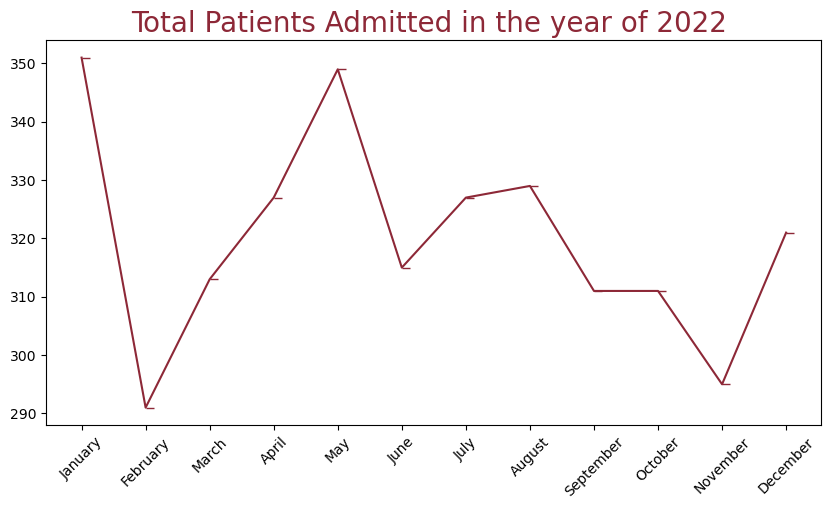

In [86]:
# setting the figure size
plt.figure(figsize=(10,5))

plt.plot(monthly_admission['Month Name'],monthly_admission['Total Patients'],
        marker=1, linestyle='-', color='#8D2837')
plt.title(f"Total Patients Admitted in the year of {selected_year} ", fontsize=20, color='#8D2837')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
## Total Patient Admissions by Year

In [87]:
# Extract Year from 'Admission Date'
health_data['Admission Year'] = health_data['Admission Date'].dt.year

#Group by Year and Count Admissions
admission_by_year = (
    health_data
    .groupby('Admission Year')
    .size()
    .reset_index(name='Total Patients')
)
# Sort by year
admission_by_year = admission_by_year.sort_values('Admission Year')

print("Total Patients Admitted by Year:")
print(admission_by_year)


Total Patients Admitted by Year:
   Admission Year  Total Patients
0            2022            3840
1            2023            3816
2            2024             344


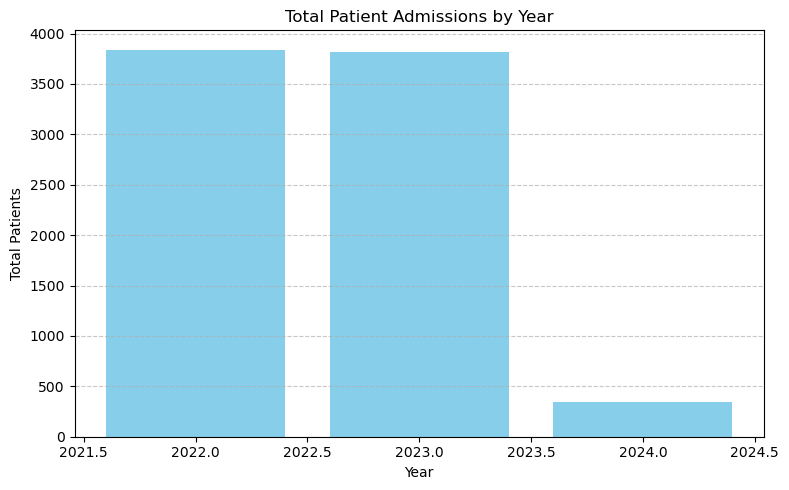

In [88]:
# Visualise the Total Patients Admission by Year by Bar chart
plt.figure(figsize=(8, 5))
plt.bar(admission_by_year['Admission Year'], admission_by_year['Total Patients'], color='skyblue')
plt.title("Total Patient Admissions by Year")
plt.xlabel("Year")
plt.ylabel("Total Patients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
## Compare Year-over-Year Growth

In [89]:
# Extract year
health_data['Admission Year'] = health_data['Admission Date'].dt.year

# Group by year
yearly_admissions = (
    health_data
    .groupby('Admission Year')
    .size()
    .reset_index(name='Total Patients')
)

# Calculate YoY Growth (%)
yearly_admissions['YoY Growth (%)'] = yearly_admissions['Total Patients'].pct_change() * 100

# Round for readability
yearly_admissions['YoY Growth (%)'] = yearly_admissions['YoY Growth (%)'].round(2)

print("Year-over-Year Admissions with Growth Rate:")
print(yearly_admissions)


Year-over-Year Admissions with Growth Rate:
   Admission Year  Total Patients  YoY Growth (%)
0            2022            3840             NaN
1            2023            3816           -0.62
2            2024             344          -90.99


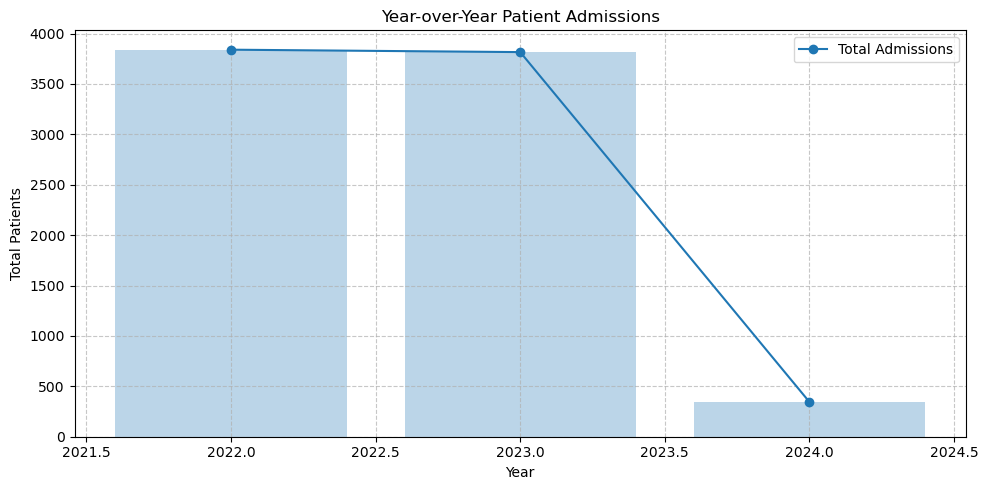

In [90]:
# Visualise Year-over-Year Growth

plt.figure(figsize=(10, 5))
plt.plot(yearly_admissions['Admission Year'], yearly_admissions['Total Patients'], marker='o', label='Total Admissions')
plt.bar(yearly_admissions['Admission Year'], yearly_admissions['Total Patients'], alpha=0.3)
plt.title("Year-over-Year Patient Admissions")
plt.xlabel("Year")
plt.ylabel("Total Patients")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


In [91]:
## Get Per-Month Totals for Multiple Years

In [92]:
# Extract Year and Month
health_data['Admission Year'] = health_data['Admission Date'].dt.year
health_data['Admission Month'] = health_data['Admission Date'].dt.month
health_data['Month Name'] = health_data['Admission Date'].dt.strftime('%b')

# Group by Year and Month
monthly_multi_year = (
    health_data
    .groupby(['Admission Year', 'Admission Month', 'Month Name'])
    .size()
    .reset_index(name='Total Patients')
    .sort_values(['Admission Year', 'Admission Month'])
)

print("Monthly Admissions Across Years:")
print(monthly_multi_year.head(12))  # show 1st year as example


Monthly Admissions Across Years:
    Admission Year  Admission Month Month Name  Total Patients
0             2022                1        Jan             351
1             2022                2        Feb             291
2             2022                3        Mar             313
3             2022                4        Apr             327
4             2022                5        May             349
5             2022                6        Jun             315
6             2022                7        Jul             327
7             2022                8        Aug             329
8             2022                9        Sep             311
9             2022               10        Oct             311
10            2022               11        Nov             295
11            2022               12        Dec             321


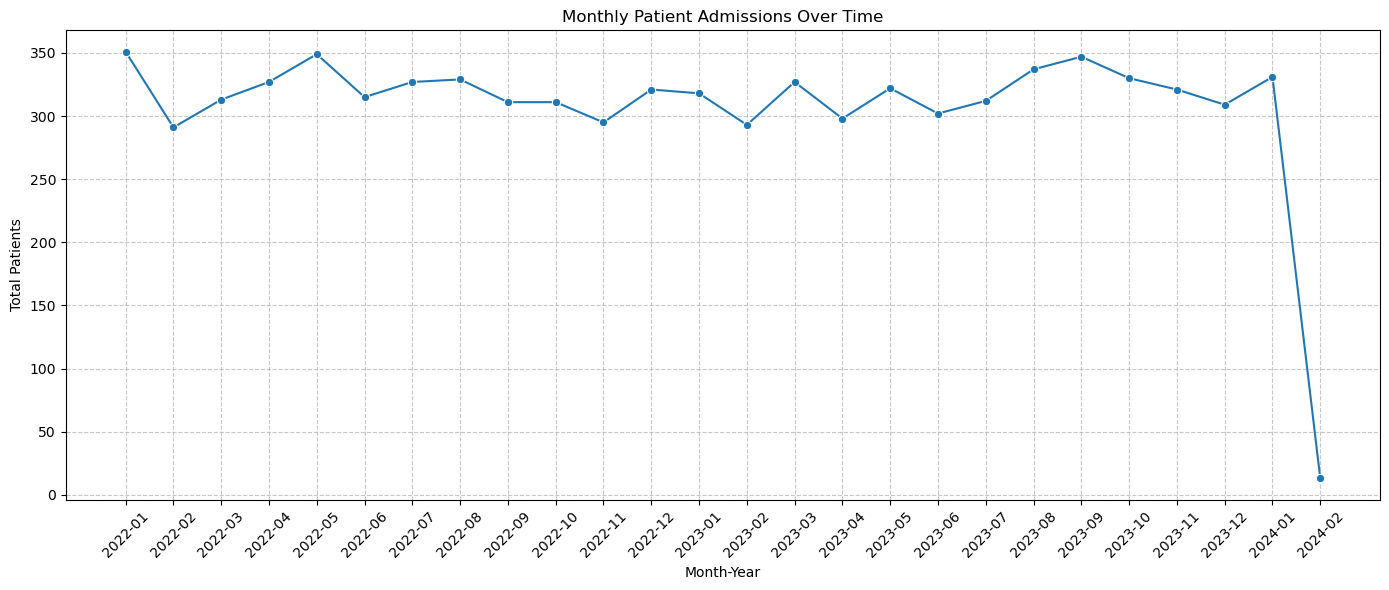

In [93]:


# Create a "Month-Year" label for plotting
monthly_multi_year['Month-Year'] = (
    monthly_multi_year['Admission Year'].astype(str) + '-' +
    monthly_multi_year['Admission Month'].apply(lambda x: f"{x:02d}")
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_multi_year,
    x='Month-Year',
    y='Total Patients',
    marker='o'
)
plt.xticks(rotation=45)
plt.title("Monthly Patient Admissions Over Time")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
## Plot a Heatmap by Year and Month

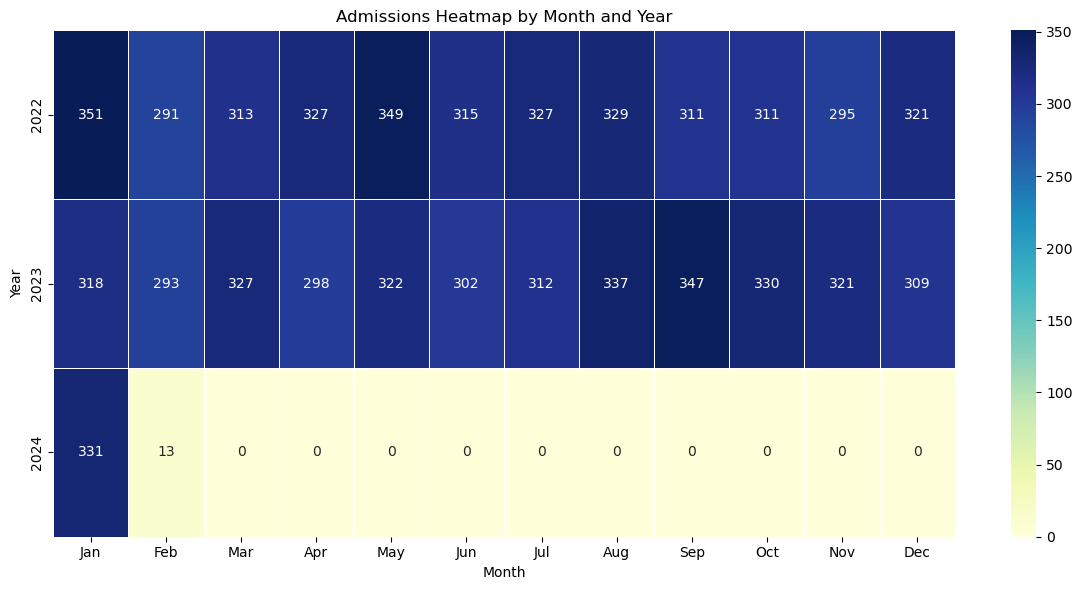

In [94]:
# Create pivot table for heatmap
heatmap_data = health_data.pivot_table(
    index='Admission Year',
    columns='Month Name',
    values='Admission Date',  # can be any column, we’re counting rows
    aggfunc='count',
    fill_value=0
)

# Ensure month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data = heatmap_data[month_order]

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Admissions Heatmap by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


In [ ]:
Operational Insights

These help with resource planning, staffing, and efficiency.

✅ Suggestions:

Peak admission periods (e.g., months/days/hours with highest load)

Admission trends by day and time (e.g., weekends vs weekdays, night vs day)

Average Length of Stay (ALOS) per year/month/department

Bed Occupancy Trends (if you have discharge data)

Readmission Rates by department or condition




Demographic Insights

If you have patient info like age, gender, etc.

✅ Suggestions:

Admissions by Age Group (e.g., 0–18, 19–35, 36–60, 60+)

Gender-based Admission Trends

Chronic condition trends by age/gender if diagnosis info is available

🔹 3. Clinical Insights

If your dataset has department, diagnosis, or treatment codes.

✅ Suggestions:

Top 10 most common diagnoses or admission reasons

Trends in specific conditions (e.g., increase in respiratory issues post-COVID)

Admissions by Department (e.g., ICU vs ER vs Maternity)

Surgery vs Non-surgery admission proportions

🔹 4. Comparative Insights

Compare different time periods or entities.

✅ Suggestions:

Pre- and Post-COVID comparisons (if your data spans 2020+)

Year-on-Year comparison by department

Hospital vs National average (if external data is available)

Admission trends across seasons (Winter vs Summer)

🔹 5. Predictive/Forecasting (Advanced)

Requires modeling, but can impress stakeholders.

✅ Suggestions:

Forecast future admissions using time series models (ARIMA, Prophet, etc.)

Seasonal peaks prediction to assist with staffing/hospital prep

Patient risk scoring for re-admission (if patient data is available)

📈 Visualization Ideas

Help communicate insights clearly:

Stacked bar charts: e.g., Admissions by Month and Department

Time series line charts: For trends

Heatmaps: For day/month patterns

Boxplots: For distribution of stay durations or ages

Pie charts: For proportion breakdowns (e.g., gender, condition types)